<a href="https://colab.research.google.com/github/Tmills1/Statistical-Analysis-Notebook/blob/main/Tutorial_3(with_exercise_solutions)_Introduction_to_Statistical_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Statistical Analysis.

Let's begin by mounting our drive. This will help us retrieve the necessary dataset from our google drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir("/content/drive/MyDrive/InclusionBridgeMasterFolder/CollegeAdvantageMaterials/CA 2023/InclusionBridgePrepResources/Coaches/datasets")

In this tutorial, we will be making use of the heart disease dataset. This data set dates from 1988 and contains 76 observations. Here is a description of the features in the dataset:

- **age**
- **sex**
- **cp**: chest pain type (4 values)
- **trestbps**: resting blood pressure
- **chol**: serum cholestoral in mg/dl
- **fbs**: fasting blood sugar > 120 mg/dl
- **restecg**: resting electrocardiographic results (values 0,1,2)
- **thalach**: maximum heart rate achieved
- **exang**: exercise induced angina
- **oldpeak**: ST depression induced by exercise relative to rest.
- **slope**: the slope of the peak exercise ST segment
- **ca**: number of major vessels (0-3) colored by flourosopy
- **thal**: 0 = normal; 1 = fixed defect; 2 = reversable defect
- **target**: indicates the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.

We will also be reviewing a number of statistical concepts such as:
- Confidence Intervals
- Hypothesis testing
- A/B testing
- Proportion Test

We will also leverage [statsmodels](https://www.statsmodels.org/stable/index.html): a Python package that provides a complement to `scipy` for statistical computations. Let's begin by loading the dataset:

In [ ]:
import numpy as np
import pandas as pd
heart_data = pd.read_csv("heart.csv")
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


We will also drop all the missing values in the dataset i.e the null values.

In [ ]:
heart_data.dropna(inplace=True)

Additionally, we will replace 1 and 0 in the `age` column with `Male` and `Female` in a new column named `Gender`.

In [ ]:
heart_data['Gender'] = heart_data['sex'].replace({1: "Male", 0: "Female"})

## Descriptive and Inferential Statistics


In practical statistical analysis, the key focus is distinguishing between a population and a sample. The goal is either to describe a sample or a population, or to use a sample to make inferences about the population. Descriptive statistics involve measuring averages, proportions, and visualizing data, while inferential statistics involve drawing conclusions about the population based on information from the sample.

#### Quantitative and Qualitative variables

Variables in statistics can describe either `qualitative`, or `quantitative`. Generally, a variable that describes how much there is of something is called a **quantitative variable**. Examples of quantitative variables in our dataset includes `trestbps`, `chol`, `thalach` and `age`. A few variables in our dataset clearly don't describe quantities. The `target` variable, for instance, describes the status of a person's heart. The `thal` variable has three categories encoded as 0, 1, and 2. These variables describe properties that are not quantitative., and as such are called `qualitative` variables or `categorical` variables.

In [ ]:
#Get numerical columns
heart_data.select_dtypes(include=np.number).columns.tolist()

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target']

You will notice that encoded variables such as `thal` and `target`, which are obviously categorical are displayed. This is why it's good to understand what your data columns means.
Let's look at how to get categorical variables.

In [ ]:
#Get categorical columns
heart_data.select_dtypes(include="object").columns.tolist()

['Gender']

In [ ]:
heart_data.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Gender
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,Male
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,Male
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,Male
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,Male
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,Female



#### Introduction to Statistics

In the visualization tutorial, we learned how to use frequency distribution tables to bring the data to a comprehensible form to find patterns. Next, we will learn to summarize the distribution of a variable with a single value such as it's `mean,  median, or mode`.

For a clear description of each measure, see [here](https://youtu.be/h8EYEJ32oQ8)

In [ ]:

# let's look at the mean (or average) age of patients in the dataset
mean_age = heart_data["age"].mean()
print(f"mean age of patients: {mean_age}")

mean age of patients: 54.43414634146342


- **Mean:** The mean is the sum of the value of each observation in a dataset divided by the number of observations. This is also known as the arithmetic average.

In [ ]:

#let's look at the median value of peak heart rates achieved by patients in our dataset.
median_rate = heart_data["thalach"].median()
print(f"median peak heart rate achieved by patients: {median_rate}")

median peak heart rate achieved by patients: 152.0


- **Median**: The median is the middle value in distribution when the values are arranged in ascending or descending order. The median divides the distribution in half (there are 50% of observations on either side of the median value). In a distribution with an odd number of observations, the median value is the middle value.

In [ ]:

# let's look at the most frequent gender represented in our dataset
most_frequent_gender = heart_data.mode()["Gender"][0]
print(f"the most frequent gender that occurs in our dataset is: {most_frequent_gender}")

the most frequent gender that occurs in our dataset is: Male


#### Measures of Variability

Furthermore, we will measure the variability in a distribution. If we have a distribution A with the values [3, 3, 3, 3], and a distribution B with [30, 1, 15, 43], we can clearly see that `there's much more variability (diversity) in B`. An inference like this is made using measures of variability like `variance` and `standard deviation`.

For a clear description of each measure, see [measures of variablility](https://youtu.be/E4HAYd0QnRc)

In [ ]:
heart_data.groupby("Gender")["chol"].var()

Gender
Female    4155.965826
Male      1862.400200
Name: chol, dtype: float64

- **Variance:** A variance of zero indicates that all of the data values are identical. The values for variance are always positive. A small variance indicates that the data points tend to be very close to the mean, and to each other. A high variance indicates that the data points are very spread out from the mean, and from one another.

In [ ]:
heart_data.groupby("Gender")["chol"].std()

Gender
Female    64.466781
Male      43.155535
Name: chol, dtype: float64

- **Standard Deviation:** Low standard deviation means data are clustered around the mean, and high standard deviation indicates data are more spread out. A standard deviation close to zero indicates that data points are close to the mean, whereas a high or low standard deviation indicates data points are respectively above or below the mean.

In [ ]:
standard_dev = heart_data["trestbps"].std()
print(f"standard deviation: {standard_dev}")

standard deviation: 17.516718005376408


Before delving deep into the topics let’s get acquainted with some statistical terminologies.

- **population**: It is the set of all similar individuals. For example the population of a city, students of a college, etc.

- **sample**: It is a small set of similar individuals drawn from the population. Similarly, a random sample is a sample drawn at random from the population.

- **parameters**:  is any numerical measure or characteristic that describes a population. Unlike a statistic, which is calculated from a sample of data, a parameter is a fixed value that represents the entire populationn.

- **statistic**:  is any numerical measure or summary that is calculated from a sample of data. It provides information about a specific characteristic or property of the sample. some examples include: mean and standard deviation

- **Z-score**: also known as the standard score, is a statistical measure that indicates how many standard deviations a particular data point is from the mean of a distribution. It is a way to standardize and compare values from different distributions. The z-score tells us the number of standard deviations a data point is above or below the mean.
    - If the z-score is positive, it means the data point is above the mean.
    - If it is negative, it means the data point is below the mean.
    - A z-score of 0 indicates that the data point is exactly at the mean.

  Given by: $$  z = \frac{(x - μ)}{σ}$$


- **Bootstrapping:** The process of bootstrapping involves creating multiple resamples (random samples with replacement) from the original sample data. Each resample is of the same size as the original sample. By resampling, we simulate multiple `pseudo-samples` that are representative of the original population. Once we have these resamples, we perform the desired statistical analysis (such as calculating a mean) on each resample.

We call a smaller group selected from a `population` a `sample`. When we select a smaller group from a population we're `sampling`. For instance, say we took a sample of 100 people from a population of over 50,000 people.

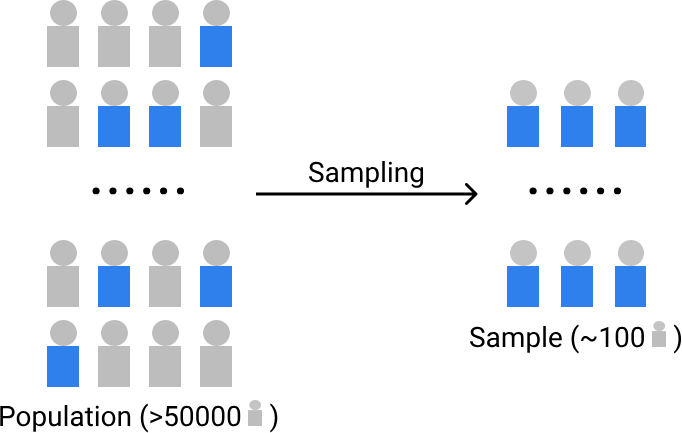


**In terms of descriptive summary**: suppose we collect data from a random sample of 100 households in the city and calculate the average income for those households. The resulting value, let's say $60,000, would be the `statistic`. Whereas, the `parameter` represents the average income of all households in the city (which is unknown).

#  Understanding Confidence Intervals

A confidence interval is an interval estimate that provides a range of plausible values for the population parameter. It is constructed using a point estimate (such as a sample mean or proportion) and a margin of error. The wider the confidence interval, the lower the precision of the estimate, as it reflects a greater amount of uncertainty. Conversely, a narrower confidence interval indicates a more precise estimate.

When asked about your height, you might respond by stating that you are 1.93 meters tall. However, this answer does not provide any information about the uncertainty associated with the measurement. A confidence interval provides a range of values within which the true value of the measured quantity is likely to fall. So, you are asked about your height, you could respond with an error estimate or with a confidence interval, like `with a 95% confidence I am from 1.92m to 1.93m tall`.

Confidence intervals are useful in providing a range of plausible values for the population parameter, allowing us to make more informed decisions and draw conclusions about the population based on the sample data. The formula for confidence interval can be expressed as:

$$ CI = ([\bar{x} - (z * SE)],   [\bar{x} + (z * SE)])$$

where:

  - CI	=	confidence interval
  - $\bar{x}$	=	observation value (*the value we intend to obtain a CI for*)
  - $\bar{x} - (z * SE)$ =	lower interval
  - $\bar{x} +_ (z * SE)$	=	upper interval
  - z =	z score
  - SE = standard error

We will talk a bit about the parameters above in the next section.

#### Confidence Interval for proportions

- For clarity on CI for proportions, see [Confidence Interval and margin of error for proportions](https://youtu.be/hlM7zdf7zwU)

Okay, let's get straight into business! We are going to construct a confidence interval (CI) for the female population proportion that has heart disease using a confidence level of 95%. To achieve, this we will follow a sequence of steps that can be generalized for cases requiring the estimation of confidence intervals.

#### Step 1: First, we calculate a point estimate of the population parameter based on the sample data. In our scenario, the proportion of diseased females would serve as the point estimate.


In [ ]:
# Extract the population of females.
female = heart_data[heart_data["Gender"] == "Female"]

Let's create a crosstab for each group. Crosstabs are basically data tables that presents the frequencies or counts of the combinations of categories from the two variables.

In [ ]:
cross_tab = pd.crosstab(female["target"], female["Gender"])
cross_tab

Gender,Female
target,
0,86
1,226


The number of females who have heart disease is 226. Let's get the equivalent in terms of proportion.

In [ ]:
# Perform cross-tabulation and normalize by index (column-wise proportions)
cross_tab = pd.crosstab(female["target"], female["Gender"], normalize='columns')
cross_tab

Gender,Female
target,
0,0.275641
1,0.724359


In [ ]:
female_diseased_proportion = cross_tab['Female'].loc[1]
female_diseased_proportion

0.7243589743589743

#### Step 2: Next, we determine the margin of error, which accounts for the uncertainty in the estimate. The margin of error depends on the desired level of confidence and the variability of the data. In our case, the confidence level is 95%. It is important to note common confidence levels have benchmarked z-scores.

| Confidence level     | Z-score |
| -------------------- | ----------- |
| 90%                  | 1.645    |
| 95%                  | 1.96     |
| 98%                  | 2.33       |
| 99%                  | 2.575       |

**What is the signficance of the z-score?**

A z-score measures the distance between a data point and the mean using standard deviations. Z-scores can be positive or negative. The sign tells you whether the observation is above or below the mean. For example, a z-score of `+2` indicates that the data point falls `two standard deviations above the mean`, while a `-2` signifies it is `two standard deviations below the mean`. A z-score of `zero equals the mean`. This measure is important because it tells where your observation lies relative to the entire distribution of data.




The formula for standard error of a sample proportion is denoted by:
$$  Standard Error = \sqrt{\frac{(p(1-p))}{n}}$$
  - where n is the number of samples and p is the proportion we are testing for.

The margin of error is then defined as: `z-score * standard error`.

Let's obtain the standard error first:

In [ ]:
n_female = female.shape[0] #sample size: Total number of females

#compute standard error
se_female = np.sqrt(female_diseased_proportion * (1 - female_diseased_proportion) / n_female)
print(f"The standard error {se_female}")

The standard error 0.02529714756803247


In [ ]:
z_score = 1.96 #benchmarked z-score for 95% confidence level
error_margin = se_female * z_score

#### Step 3: Using the point estimate and the margin of error, we will construct the confidence interval. The confidence interval is typically symmetrical around the point estimate. It is expressed as `point estimate ± margin of error.` For our example, the point estimate is ~0.7243 and the margin of error is 2,000.

Let's calculate the confidence interval:

In [ ]:
lower = female_diseased_proportion - error_margin #lower limit of the CI
upper = female_diseased_proportion + error_margin #upper limit of the CI

print(f"The confidence interval is: ({lower},{upper})")

The confidence interval is: (0.6747765651256307,0.773941383592318)


#### Enter Statsmodel!
Remember the python package that we intend to leverage? We can tie all of this steps and obtain the confidence interval with a single line of code using the [stats.proportion_confint()](https://www.statsmodels.org/dev/generated/statsmodels.stats.proportion.proportion_confint.html) function. We will pass in the following parameters:
- count: number of diseased females.
- nobs: total number of females.
- alpha: significance level, this is represented as 1-(confidence_level/100).

In [ ]:
import statsmodels.api as sm
sm.stats.proportion_confint(count = n_female * female_diseased_proportion, nobs= n_female, alpha= 0.05)

(0.6747774762140357, 0.773940472503913)

#### Confidence Interval of a mean measure

Let's try another example. we will calculate the confidence interval of the mean cholesterol level of the male population using a confidence level of 95%.
- For clarity on confidence interval on mean scores,  see [confidence interval](https://youtu.be/ENnlSlvQHO0).

In [ ]:
# Perform cross-tabulation and normalize by index (column-wise proportions)
chol_average = heart_data.groupby("Gender")['chol'].mean()

Male_chol_average = chol_average.loc["Male"]
Male_chol_average


239.23702664796633

To calculate the standard error for a mean value, you can use the formula:

$$  Standard Error = \frac{(σ)}{sqrt(n)}$$
n = sample size.
Now let's compute the standard error:

In [ ]:

# Extract the data subset of interest: cholesterol levels of male patients
data = heart_data[heart_data["Gender"] == 'Male']['chol']

#compute standard error
SE = data.std()/np.sqrt(data.shape[0])
print(f"standard error: {SE}")



standard error: 1.6161874865791188


Compute the confidence interval:

In [ ]:
z_score = 1.96 #benchmarked z-score for 95% confidence level
error_margin = SE * z_score

lower = Male_chol_average - error_margin #lower limit of the CI
upper = Male_chol_average + error_margin #upper limit of the CI

print(f"The confidence interval is: ({lower},{upper})")

The confidence interval is: (236.06929917427126,242.4047541216614)


Using the statsmodel library:
Here we will use the `.tconfint_mean()` function. This function is different from the one we used earlier. This function applies to cases where you are interested in getting the confidence intervals on mean values

In [ ]:

# Calculate the confidence interval using statsmodels
confidence_interval = sm.stats.DescrStatsW(data).tconfint_mean(alpha=0.05)

print("Confidence Interval:", confidence_interval)

Confidence Interval: (236.06396349142227, 242.4100898045104)


### Interpreting Confidence Intervals

A confidence interval has a single purpose – to estimate an unknown parameter based on data in a random sample. In the last section, we said that the interval (67%, 77%) was an approximate 95% confidence interval for the percentage of diseased females among others in the population. That was a formal way of saying that by our estimate, the percent of diseased patients among the females in the population was somewhere between 67% and 77%, and that our process of estimation is correct about 95% of the time.

#Hypothesis Testing

A hypothesis can be seen as an educated guess about something in the world that can be tested by an experiment or through observations. In the general, a hypothesis statement would look like this:

```
If I do X to an independent variable then Y will happen to the dependent variable.
```

Winning a hypothesis test often involves rejection. The idea is to build a null hypothesis statement from the given data and conclude that on presenting new evidence, the initially built hypothesis was wrong. A null hypothesis often looks like a statement. For instance, a researcher states that if knee surgery patients perform physiotherapy twice every week (as opposed to four times) their recovery will be faster. To reject this, we need new evidence and tests that will prove otherwise, stating physiotherapy twice a week does not result in faster healing.

The first step in hypothesis testing is to set up two competing hypotheses. The hypotheses are the most important aspect. If the hypotheses are incorrect, your conclusion will also be incorrect.

The two hypotheses are named the null hypothesis and the alternative hypothesis.

- **Null hypothesis:**
The null hypothesis is typically denoted as `Ho` The null hypothesis states the "status quo". This hypothesis is assumed to be true until there is evidence to suggest otherwise.

- **Alternative hypothesis:**
The alternative hypothesis is typically denoted as `H1`. This is the statement that one wants to conclude.

The goal of hypothesis testing is to see if there is enough evidence against the null hypothesis. In other words, to see if there is enough evidence to reject the null hypothesis. If there is not enough evidence, then we fail to reject the null hypothesis.

Here are some resources to help you out with understanding the fundamentals:

- [Idea behind Hypothesis Testing](https://youtu.be/cn4S3QqEBRg)
- [P-value and significance test](https://youtu.be/KS6KEWaoOOE)
- [Hypothesis Testing and the Null Hypothesis](https://youtu.be/0oc49DyA3hU)

# A/B Testing


A/B testing, also known as split testing, is a statistical technique used to compare two groups, to determine which one performs better in terms of a specific goal or outcome. In an A/B test, two variants, typically labeled as A and B, are randomly assigned to different groups of users or visitors. The groups are then exposed to either version A or B, and their behavior or responses are measured and analyzed. By comparing the performance metrics of the two variants, such as conversion rates or click-through rates, statistical inference can be made to determine if there is a significant difference between them.

**Case Study:** A medical teaching hospital believes that high cholesterol levels is a vital indication of heart disease risk. This belief suggests that patients with cholesterol levels are at risk of developing a heart disease. They will likely use this information to inform their medical decisions and recommendations.

As a data scientist, they want you to verify their claim using hypothesis testing.

#### Step 1

**State the null hypothesis (H0) and alternative hypothesis (H1):** The null hypothesis is a statement of no effect or no difference, while the alternative hypothesis is the statement we want to test, usually suggesting that there is an effect or difference.

You are going to conduct a hypothesis test with the following null and alternative hypotheses:

- **Null Hypothesis**: There is no significant difference in the cholesterol levels in patients with heart disease and those without.
- **Alternative Hypothesis**: The presence of heart disease is significantly impacted by cholestrol levels.

#### Step 2

**Set the significance level (α):** The significance level, denoted by α, is the probability of rejecting the null hypothesis when it is actually true. Commonly used values for α are 0.05 (5%) or 0.01 (1%).

In most cases, hypothesis testing is done with a confidence level of 95% (i.e 0.05 significant level).

#### Step 3

**Determine the test statistic:** Choose an appropriate test statistic that is relevant to the hypothesis being tested. The choice of test statistic depends on factors such as the type of data (e.g., categorical or continuous) and the specific hypothesis being tested.

**Test statistic choice:** A suitable test statistic for investigating the influence of cholestrol level on diseased and healthy patients is the `average cholestrol level` for each group. By comparing this difference to the null hypothesis, which assumes no significant difference in cholesterol based on the presence of heart disease, we can determine if there is enough evidence to support the alternative hypothesis.

#### Step 4
**Calculate the observed test statistic**

This is the first step of your hypothesis test. We will begin by extracting the groups of interest `healthy` and `diseased` patients in our dataset. This is because our hypothesis test revolves around these two groups.

In [ ]:
# Define the groups based on marital status
healthy_group = heart_data[heart_data['target'] == 0]
diseased_group = heart_data[heart_data['target'] == 1]

Next, we will compute the observed test statistic. This is the actual difference between the mean cholestrol level of patients belonging to these groups.

In [ ]:
observed_statistic = diseased_group['chol'].mean() - healthy_group['chol'].mean()
observed_statistic

-10.313497717869211

#### Step 5
**Run trials and calculate simulated test statistic:** We will create the different versions of our dataset, by shuffling the `target` column. This helps ensure that only one property is changed between the groups to isolate the impact of that particular change. Now, think of the entire dataset as a population. We will now draw samples from the dataset, shuffle the target labels for these samples and calculate the test statistic value for these set of samples.

**Why do we run simulation trials?**

Running multiple simulation trials in hypothesis testing serves several purposes. First, it helps assess the variability of results and determine the likelihood of obtaining a specific outcome by chance alone. Second, simulations allow for estimating statistical power, which measures the ability of a test to detect true effects. Additionally, these trials help evaluate the rates of `Type I and Type II errors`, providing insights into the reliability of the test. Lastly, simulations allow researchers to test the robustness of assumptions made in statistical procedures. Overall, conducting multiple simulation trials enhances understanding, improves decision-making, and strengthens the validity of hypothesis testing.

**what are Type I and Type II errors?**
- **Type I Error (False Positive)**: This error occurs when the null hypothesis is true, but we incorrectly reject it in favor of the alternative hypothesis. In other words, we conclude that there is a significant effect or relationship when, in reality, there isn't one.

- **Type II Error (False Negative):** This error occurs when the null hypothesis is false, but we fail to reject it and incorrectly accept the null hypothesis. In this case, we conclude that there is no significant effect or relationship when, in reality, there is one.

Let's create a dataset subset, we will sample a total number of 300 instances (rows) (without replacement) for each of the groups and recombine into a single data subset `sampled_heart_data`.

In [ ]:
# Perform hypothesis testing
sample_size = 300  # Define the sample size for each group

#Create a subset of the single_group and the married_group
healthy_subset = healthy_group.sample(n=sample_size, replace= False)
diseased_subset = diseased_group.sample(n=sample_size, replace= False)


#Combine data to create a balanced subset with only the relevant columns: `Risk_Flag` and `Marital Status` (You do not have to do this on a single line!)
combined = pd.concat([healthy_subset, diseased_subset], ignore_index=True)
sampled_heart_data = combined[['chol', 'target']]
sampled_heart_data.head()


,chol,target
0,294,0
1,254,0
2,204,0
3,268,0
4,164,0


It will be helpful to have a function that computes our test statistic from the combined dataset of samples drawn from our original data.

In [ ]:
def calculate_test_statistic(combined_data, target_col, numeric_col):
    healthy_mean = combined_data[combined_data[target_col] == 0][numeric_col].mean()
    diseased_mean = combined_data[combined_data[target_col] == 1][numeric_col].mean()
    test_statistic = diseased_mean - healthy_mean
    return test_statistic

Next, we will carry out 1000 permutation trials. In each trial, we will shuffle the `target` column and compute the test statistic, which is the difference in the mean cholesterol level is a of diseased and healthy patientsm. We will then store the result of each of trial in an array called `simulated_statistics_list`.

In [ ]:
repetitions = 1000  # Define the number of repetitions

# Initialize an array to store the test statistics
simulated_statistics_list = []
np.random.seed(42)

# simulate 1000 test statistics by shuffling the target column, computing statistics, and adding to the simulated_statistics_list
for i in range(repetitions):
    shuffled_group = sampled_heart_data.copy() #create a copy of the dataset of samples
    shuffled_group['target'] = np.random.permutation(shuffled_group['target'])
    test_statistic = calculate_test_statistic(shuffled_group, 'target', 'chol')
    simulated_statistics_list.append(test_statistic)

#### Step 5

**Calculate the p-value:** The p-value is the probability of obtaining a test statistic as extreme as, or more extreme than, the observed test statistic, assuming that the null hypothesis is true. It measures the strength of evidence against the null hypothesis.

In [ ]:
p_value = (np.abs(simulated_statistics_list) >= np.abs(observed_statistic)).mean()

# Print the results
print("Observed Test Statistic:", observed_statistic)
print("P-value:", p_value)

Observed Test Statistic: -10.313497717869211
P-value: 0.009


Now, let's plot the distribution of test statistics calculated during all of our simulation trials. We will also show the position of the observed (actual) test statistic for comparison.

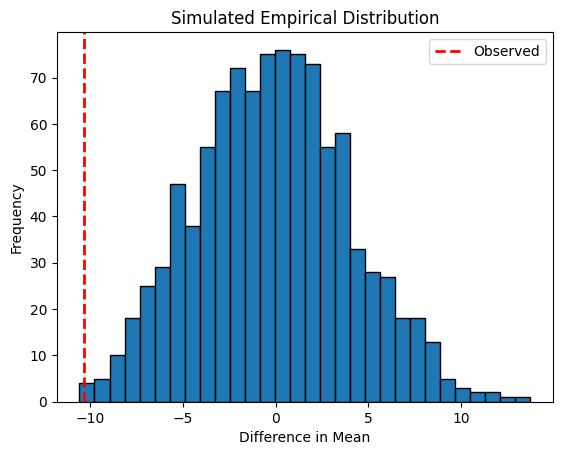

In [ ]:
# if you would like to check the distribution of values from all trials, plot the simulated emperical distribution
import matplotlib.pyplot as plt
plt.hist(simulated_statistics_list, bins=30, edgecolor='black')
plt.axvline(x=observed_statistic, color='red', linestyle='dashed', linewidth=2, label='Observed')
plt.xlabel('Difference in Mean')
plt.ylabel('Frequency')
plt.title('Simulated Empirical Distribution')
plt.legend()
plt.show()

#### Step 6

**Compare the p-value with the significance level:**

  - If the p-value is less than or equal to the significance level (p ≤ α), we reject the null hypothesis in favor of the alternative hypothesis.
  - If the p-value is greater than the significance level (p > α), we fail to reject the null hypothesis.

In [ ]:
conclusion = ''
significance_level = 0.05;
if p_value <= significance_level:
  conclusion = 'The p-value we observed is below the 5% cutoff, so we conclude that the data support the alternative hypothesis.'
else:
  conclusion = 'The p-value we observed is above the 5% cutoff, so we conclude that there is not enough evidence to reject the null hypothesis.'

conclusion

'The p-value we observed is below the 5% cutoff, so we conclude that the data support the alternative hypothesis.'

Now let's try out the same hypothesis testing with the `statsmodel` library!
Statsmodel implements a two sample t-test is also known as the independent samples, independent, and unpaired t-test. Moreover, this type of statistical test compares two averages (means) and will give you information if these two means are statistically different from each other. The t-test also tells you whether the differences are statistically significant. In other words it lets you know if those differences could have happened by chance.

In [ ]:
import statsmodels.api as sm
test_statistic, p_value, _ = sm.stats.ttest_ind(healthy_group['chol'],diseased_group['chol'])
print(p_value)

0.0013525712504626976


Now we have obtained a p-value which is less than the significance levle. Hence we conclude that data supports the alternative hypothesis.

### Hypothesis Testing: Difference in Population Proportions


Here are some resources to understand the Hypothesis testing for porportions:

-



Let's look at the following research question: `Is there a significant difference between the population proportions of females that suffer from heart disease and male patients suffering from the same disease?`

We will shape our hypotheses as:

- **Null hypothesis: There is no significant difference between the proportion of females and males who have heart diseases**

- **Alternative hypothesis: There exist a significant difference between the proportion of females and males who have heart diseases**

**Test statistics of choice:** To conduct an hypothesis test using the  dataset, we will divide the dataset into two groups: female (Group A) and male (Group B) patients. The test statistic used in this test will be the difference in between the proportion of female and male patients who have heart diseases.

For each group, you will count the number of diseased (target = 1) and divide it by the total number of individuals in that group. The difference in these proportion will serve as the test statistic.

In [ ]:
female = heart_data[heart_data["Gender"] == "Female"]
male = heart_data[heart_data["Gender"] == "Male"]

We will create a subset of our dataset consisting of 200 random females patients and 200 random male patients. Think of our dataset as the population and the newly created subset as the sample.



In [ ]:
# Perform hypothesis testing
sample_size = 200  # Define the sample size for each group

#Create a subset of the female_diseased and the male_diseased
female_subset = female.sample(n=sample_size, replace= False)
male_subset = male.sample(n=sample_size, replace= False)


#Combine data to create a balanced subset with only the relevant columns: `Gender` and `target` (You do not have to do this on a single line!)
combined = pd.concat([female_subset, male_subset], ignore_index=True)
sampled_heart_data = combined[['Gender', 'target']]

#Revert Gender to numerical: for proportion calculation purpose
sampled_heart_data['Gender'].replace({'Male':0,"Female":1},inplace=True)
sampled_heart_data.head()


<ipython-input-37-40eac753918e>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sampled_heart_data['Gender'].replace({'Male':0,"Female":1},inplace=True)


,Gender,target
0,1,0
1,1,0
2,1,1
3,1,0
4,1,1


Let's define the function for our test statistics:

In [ ]:
def difference_of_proportion(data):
      """Takes: name of table, a target column name, and the name of the
      column that indicates the group to which each row belongs
      Returns: Difference between the proportion of defaulters in the labeled groups"""
      diseased = data[data['target']==1]
      new_female_diseased = diseased[diseased['Gender']==0]
      new_male_diseased = diseased[diseased['Gender']==1]
      proportion_male_diseased = new_female_diseased.shape[0]/diseased.shape[0]
      proportion_female_diseased = new_male_diseased.shape[0]/diseased.shape[0]
      return proportion_female_diseased - proportion_male_diseased

Next, we will run 1000 simulation trials. For every trials we will shuffle the `Gender` column. This is because we are interested in seeing the changes in proportion of diseased people with respect to gender.

In [ ]:
repetitions = 1000  # Define the number of repetitions

# Initialize an array to store the test statistics
simulated_statistics_list2 = []
np.random.seed(42)

# simulate 1000 test statistics by shuffling the target column, computing statistics, and adding to the simulated_statistics_list
for i in range(repetitions):
    shuffled_group = sampled_heart_data.copy() #create a copy of the dataset of samples
    shuffled_group['Gender'] = np.random.permutation(shuffled_group['Gender'])
    test_statistic = difference_of_proportion(shuffled_group)
    simulated_statistics_list2.append(test_statistic)

Now we will calculate the p-value and observed statistics. Remember, the observed statistic is just the test statistic function applied across the original dataset (and not simulated shuffled samples).

In [ ]:
#compute observed test statistic
heart_data['Gender'].replace({'Male':0,"Female":1},inplace=True)
Observed_statistic2 = difference_of_proportion(heart_data)

#compute p-value
p_value = (np.abs(simulated_statistics_list2) >= np.abs(Observed_statistic2)).mean()

# Print the results
print("Observed Test Statistic:", Observed_statistic2)
print("P-value:", p_value)

Observed Test Statistic: -0.14068441064638781
P-value: 0.0


let's check the distribution of the simulated test statistic from all trials.

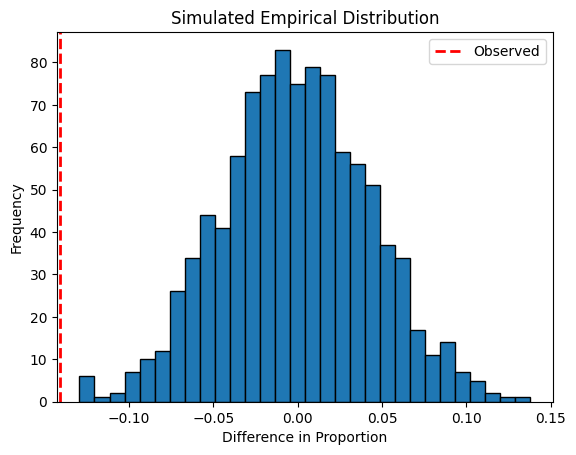

In [ ]:
# if you would like to check the distribution of values from all trials, plot the simulated emperical distribution
import matplotlib.pyplot as plt
plt.hist(simulated_statistics_list2, bins=30, edgecolor='black')
plt.axvline(x=Observed_statistic2, color='red', linestyle='dashed', linewidth=2, label='Observed')
plt.xlabel('Difference in Proportion')
plt.ylabel('Frequency')
plt.title('Simulated Empirical Distribution')
plt.legend()
plt.show()

Conclusion: The data supports the alternative hypothesis

#### Statsmodel
To perform hypothesis testing on proportions using the statsmodels library in Python, you can utilize the [proportions_ztest function](https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportions_ztest.html). This function allows you to test whether two proportions are significantly different or to compare a single proportion to a known value.
This function takes in parameters similar to the [stats.proportion_confint()](https://www.statsmodels.org/dev/generated/statsmodels.stats.proportion.proportion_confint.html) function described in the confidence interval section. We will pass in the following parameters:
- count: an array containing the total number of each subgroup of interest. e.g (diseased males and females).
- nobs: an array containing the total number of each group of interest. e.g (males and females).

In [ ]:
# Calculate the proportions of heart disease for males and females
male_cases = len(male[male['target'] == 1])
male_total = len(male)
male_proportion = male_cases / male_total

female_cases = len(female[female['target'] == 1])
female_total = len(female)
female_proportion = female_cases / female_total

# Perform the hypothesis test
count = np.array([male_cases, female_cases])
nobs = np.array([male_total, female_total])

z_score, p_value = sm.stats.proportions_ztest(count, nobs)
print("Z-score:", z_score)
print("P-value:", p_value)

Z-score: -8.948390366994612
P-value: 3.607034554789343e-19


Conclusion: P-value is extremely small and less than 0.05. Hence, we conclude that the data supports the alternative hypothesis.

## Exercise
Now you have learnt a number of things related to hypothesis testing, confidence intervals and basic descriptive statistics. Let's go through some exercises designed to test your understanding of the topics covered.

### Dataset description:

In this exercise, you will make use of the bike sharing dataset. Bike-sharing rental process is highly correlated to the environmental and seasonal settings. For instance, weather conditions, precipitation, day of week, season, hour of the day, etc, can affect the rental behaviors. This dataset contains bike sharing records of customers from Capital Bikeshare system, Washington D.C., USA. The duration is between 2011 and 2012.

The features in the dataset includes:
- instant: record index
- dteday : date
- season : season (1:springer, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- holiday : weather day is holiday or not.
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit :
  - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
  - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
  - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
  - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

First, we will load the dataset:

In [ ]:
import pandas as pd
data = pd.read_csv("bike_sharing.csv")
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Exercise 1: A/B Testing

Consider the case study below:

**Case study:** The bike rental shop believes that they get more casual (non-registered) renters during summer. They believe the weather impacts the choice of transportation. The claim is that there are more casual bike renters in the summer compared to winter, and that this relationship is not due to chance but favourable weather conditions for cycling.

As a data scientist, they want you to verify their claim using hypothesis testing.

**Exercise 1.1:** Design a null and alternative hypothesis for this problem.

A hypothesis test with the following null and alternative hypotheses:

- **Null Hypothesis**: There is no significant difference in the number of casual bike renters during summer and winter.
- **Alternative Hypothesis**: The amount of casual bike renters are significantly lower during the winter than summer seasons.

**Exercise 1.2:** What measure do you think is a perfect choice for a test statistic?

**Test statistic choice:** A suitable test statistic for investigating this claim is the difference between the average number of casual bike renters during the summer and winter seasons. By comparing this difference to the null hypothesis, which assumes no significant difference in both seasons, we can determine if there is enough evidence to support the alternative hypothesis.

**Exercise 1.3:** Compute the observed test statistic.

In [ ]:
def calculate_test_statistic(data, group_col, numeric_col):
    winter = data[data[group_col] == 4][numeric_col].mean()
    summer = data[data[group_col] == 2][numeric_col].mean()
    test_statistic = winter - summer
    return test_statistic

observed_statistic_ = calculate_test_statistic(data,  "season", "casual")
observed_statistic_

-376.9854665363947

In [ ]:
winter = data[data["season"] == 4]["casual"].mean()
winter

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
265,266,2011-09-23,4,0,9,0,5,1,2,0.609167,0.522125,0.972500,0.078367,258,2137,2395
266,267,2011-09-24,4,0,9,0,6,0,2,0.606667,0.564412,0.862500,0.078383,1776,3647,5423
267,268,2011-09-25,4,0,9,0,0,0,2,0.634167,0.572637,0.845000,0.050379,1544,3466,5010
268,269,2011-09-26,4,0,9,0,1,1,2,0.649167,0.589042,0.848333,0.110700,684,3946,4630
269,270,2011-09-27,4,0,9,0,2,1,2,0.636667,0.574525,0.885417,0.118171,477,3643,4120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,716,2012-12-16,4,1,12,0,0,0,2,0.362500,0.369938,0.838750,0.100742,538,3248,3786
716,717,2012-12-17,4,1,12,0,1,1,2,0.393333,0.401500,0.907083,0.098258,212,4373,4585
717,718,2012-12-18,4,1,12,0,2,1,1,0.410833,0.409708,0.666250,0.221404,433,5124,5557
718,719,2012-12-19,4,1,12,0,3,1,1,0.332500,0.342162,0.625417,0.184092,333,4934,5267


**Exercise 1.4:**  Create a subset of the dataset consisting of 170 random summer records and 170 random winter records. Think of our dataset as the population and the newly created subset as the sample.



In [ ]:
# Perform hypothesis testing
winter = data[data["season"] == 4]
summer = data[data["season"] == 2]

sample_size =170  # Define the sample size for each group

#Create a subset of the female_diseased and the male_diseased
summer_subset = summer.sample(n=sample_size, replace= False)
winter_subset = winter.sample(n=sample_size, replace= False)


combined = pd.concat([summer_subset, winter_subset], ignore_index=True)
sample_data = combined[['season', 'casual']]

In [ ]:
sample_data.head()

,season,casual
0,2,172
1,2,2496
2,2,968
3,2,1180
4,2,531


In [ ]:
sample_data.tail()

,season,casual
335,4,329
336,4,471
337,4,1499
338,4,892
339,4,376


In [ ]:
shuffled_group = sample_data.copy() #create a copy of the dataset of samples
shuffled_group

In [ ]:
import numpy as np
shuffled_group['season'] = np.random.permutation(shuffled_group['season'])
print(shuffled_group.head())
print(shuffled_group.tail())

In [ ]:
calculate_test_statistic(data,  "season", "casual")

-376.9854665363947

**Exercise 1.4:** Here you will carry out 1000 permutation trials. In each trial, you will shuffle the groups of interest and compute the test statistic.

In [ ]:
repetitions = 1000  # Define the number of repetitions

# Initialize an array to store the test statistics
simulated_statistics_list = []
np.random.seed(42)

# simulate 1000 test statistics by shuffling the target column, computing statistics, and adding to the simulated_statistics_list
for i in range(repetitions):
    shuffled_group = sample_data.copy() #create a copy of the dataset of samples
    shuffled_group['season'] = np.random.permutation(shuffled_group['season'])
    test_statistic = calculate_test_statistic(shuffled_group, "season", "casual")
    simulated_statistics_list.append(test_statistic)

In [ ]:
 simulated_statistics_list

**Exercise 1.5:** Next, you will compute an empirical P-value for the simulation test in the previous exercise.

In [ ]:
p_value = (np.abs(simulated_statistics_list) >= np.abs(observed_statistic_)).mean()

# Print the results
print("Observed Test Statistic:", observed_statistic_)
print("P-value:", p_value)

Observed Test Statistic: -376.9854665363947
P-value: 0.0


**Exercise 1.6:** Now attempt to visualize the distribution of the test statistics calculated during all of your simulation trials. Additionally, show the position of the observed (actual) test statistic for comparison.

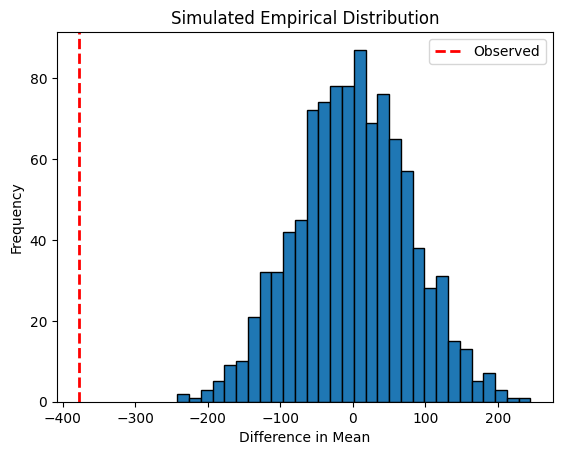

In [ ]:
# if you would like to check the distribution of values from all trials, plot the simulated emperical distribution
import matplotlib.pyplot as plt
plt.hist(simulated_statistics_list, bins=30, edgecolor='black')
plt.axvline(x=observed_statistic_, color='red', linestyle='dashed', linewidth=2, label='Observed')
plt.xlabel('Difference in Mean')
plt.ylabel('Frequency')
plt.title('Simulated Empirical Distribution')
plt.legend()
plt.show()

**Exercise 1.7** Suppose you use a significance level of 5%. Which of the following is the appropriate conclusion from the hypothesis test?
1. The p-value we observed is below the 5% cutoff, so we conclude that the data support the alternative hypothesis.
2. The p-value we observed is above the 5% cutoff, so we conclude that there is not enough evidence to reject the null hypothesis.
3. The p-value we observed is below the 5% cutoff, so we conclude that there is not enough evidence to reject the null hypothesis.
4. The p-value we observed is above the 5% cutoff, so we conclude that the data support the alternative hypothesis.

Assign `conclusion` to the number corresponding to your answer.

In [ ]:
conclusion = 1

### Exercise 2: Confidence Intervals
Note: Do not use statsmodel in exercise #2.

**Exercise 2.1:** Calculate the confidence interval for the proportion of casual people who rented a bike during summer using a confidence level of 95% using statsmodel.

*Hint: we are looking at the proportion of people who rent bikes casually during summer relative to total number of casual bike renters in the dataset*

In [ ]:
total_casual_summer =data[data['season']==2]['casual'].sum()
proportion = total_casual_summer.sum()/data['casual'].sum()

#compute standard error
std_error = np.sqrt(proportion * (1 - proportion) / total_casual_summer)
print(f"The standard error {std_error}")

z_score = 1.96 #benchmarked z-score for 95% confidence level
error_margin = std_error * z_score

lower = proportion - error_margin #lower limit of the CI
upper = proportion + error_margin #upper limit of the CI

print(f"The confidence interval is: ({lower},{upper})")

The standard error 0.0010408815213787698
The confidence interval is: (0.3262121620746661,0.33029241763847084)


**Exercise 2.2:** Calculate the confidence interval for the average wind speed during fall 2011 using a confidence level of 98%.

In [ ]:
# Extract the data subset of interest: windspeed values in 2011
values_2011 = data[data["yr"] == 0]['windspeed']
windspeed_avg = values_2011.mean()

#compute standard error
SE = values_2011.std()/np.sqrt(values_2011.shape[0])
print(f"standard error: {SE}")

z_score = 2.33 #benchmarked z-score for 98% confidence level
error_margin = SE * z_score

lower = windspeed_avg - error_margin #lower limit of the CI
upper = windspeed_avg + error_margin #upper limit of the CI

print(f"The confidence interval is: ({lower},{upper})")

standard error: 0.004024612183741361
The confidence interval is: (0.18202528840640314,0.2007799811826379)


Now that you have attempted the above exercises with python. You are required to implement a solution using the statsmodel library.

### Exercise 3: Statsmodel Implementation


**Exercise 3.1:** Verify the claim in Exercise 1 using statsmodel.

In [ ]:
import statsmodels.api as sm
test_statistic, p_value, _ = sm.stats.ttest_ind(summer['casual'],winter['casual'])
print(p_value)

1.9969038790144458e-07


**Exercise 3.2:** Calculate the confidence interval for the proportion of casual people who rented a bike during summer using a confidence level of 95% using statsmodel.

*Hint: we are looking at the proportion of people who rent bikes casually during summer relative to total number of casual bike renters in the dataset*

In [ ]:
total_casual_summer =data[data['season']==2]['casual'].sum()
proportion = total_casual_summer/data['casual'].sum()
confidence_interval = sm.stats.proportion_confint(count = data['casual'].sum() * proportion, nobs= data['casual'].sum(), alpha= 0.05)
print("Confidence Interval:", confidence_interval)

Confidence Interval: (0.32708345468417216, 0.32942112502896476)


**Exercise 3.3:** Calculate the confidence interval for the average wind speed during fall 2011 using a confidence level of 98% using statsmodel.

In [ ]:
# Extract the data subset of interest: windspeed values in 2011
values = data[data["yr"] == 0]['windspeed']
# Calculate the confidence interval using statsmodels
confidence_interval = sm.stats.DescrStatsW(values).tconfint_mean(alpha=0.02)

print("Confidence Interval:", confidence_interval)

Confidence Interval: (0.18199858151328885, 0.20080668807575214)
